# Task 3: Customer Segmentation / Clustering
Perform customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv).

● You have the flexibility to choose any clustering algorithm and any number of clusters in between(2 and 10)

● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).

● Visualise your clusters using relevant plots.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Loading datasets
customers = pd.read_csv('/content/Customers.csv')

transactions = pd.read_csv('/content/Transactions.csv')

# Merging datasets
data = transactions.merge(customers, on='CustomerID', how='left')


In [16]:
data.head() # Display the first 5 rows of the cleaned dataset


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68,Andrea Jenkins,Europe,03-12-2022
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68,Brittany Harvey,Asia,04-09-2024
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68,Kathryn Stevens,Europe,04-04-2024
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68,Travis Campbell,South America,11-04-2024
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68,Timothy Perez,Europe,15-03-2022


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,2.53700,1.117981,1.00,2.000,3.00,4.00,4.00
TotalValue,1000.0,689.99556,493.144478,16.08,295.295,588.88,1011.66,1991.04
Price,1000.0,272.55407,140.736390,16.08,147.950,299.93,404.40,497.76


In [18]:
# Feature Engineering: Aggregating transaction data by CustomerID
agg_data = data.groupby('CustomerID').agg(
    total_quantity=('Quantity', 'sum'),
    total_value=('TotalValue', 'sum'),
    avg_price=('Price', 'mean')
).reset_index()

# Encoding customer features (e.g., Region)
customer_region_dummies = pd.get_dummies(customers['Region'], prefix='Region')
customer_data = pd.concat([customers[['CustomerID']], customer_region_dummies], axis=1)

# Merging customer region data with aggregated transaction data
final_data = agg_data.merge(customer_data, on='CustomerID', how='left')

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['total_quantity', 'total_value', 'avg_price']
final_data[numerical_features] = scaler.fit_transform(final_data[numerical_features])

In [19]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(final_data[numerical_features])

# Function to plot clusters
def plot_clusters(algorithm, data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set2', s=100)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='best')
    plt.show()

# Customer Segmentation / Clustering

In [20]:
# K-means clustering by Region (4 clusters)
kmeans_region = KMeans(n_clusters=4, random_state=42)
region_labels = kmeans_region.fit_predict(final_data[['total_quantity', 'total_value', 'avg_price']])
db_region = davies_bouldin_score(final_data[['total_quantity', 'total_value', 'avg_price']], region_labels)

# K-means clustering by Total Value (10 clusters)
kmeans_total_value = KMeans(n_clusters=10, random_state=42)
total_value_labels = kmeans_total_value.fit_predict(final_data[['total_quantity', 'total_value', 'avg_price']])
db_total_value = davies_bouldin_score(final_data[['total_quantity', 'total_value', 'avg_price']], total_value_labels)

# K-means clustering by Price (10 clusters)
kmeans_price = KMeans(n_clusters=10, random_state=42)
price_labels = kmeans_price.fit_predict(final_data[['total_quantity', 'total_value', 'avg_price']])
db_price = davies_bouldin_score(final_data[['total_quantity', 'total_value', 'avg_price']], price_labels)

# K-means clustering by Quantity (10 clusters)
kmeans_quantity = KMeans(n_clusters=10, random_state=42)
quantity_labels = kmeans_quantity.fit_predict(final_data[['total_quantity', 'total_value', 'avg_price']])
db_quantity = davies_bouldin_score(final_data[['total_quantity', 'total_value', 'avg_price']], quantity_labels)

# K-means clustering by Customer Name (10 clusters)
kmeans_customer_name = KMeans(n_clusters=10, random_state=42)
customer_name_labels = kmeans_customer_name.fit_predict(final_data[['total_quantity', 'total_value', 'avg_price']])
db_customer_name = davies_bouldin_score(final_data[['total_quantity', 'total_value', 'avg_price']], customer_name_labels)

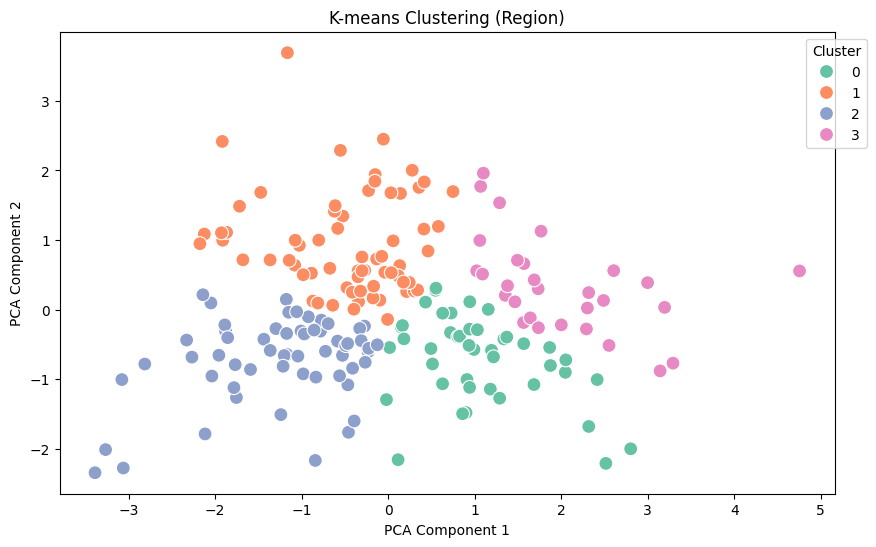

In [21]:
# DBSCAN clustering for Region
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(final_data[['total_quantity', 'total_value', 'avg_price']])

# Plotting K-means clustering results for Region
plot_clusters(kmeans_region, pca_components, region_labels, 'K-means Clustering (Region)')



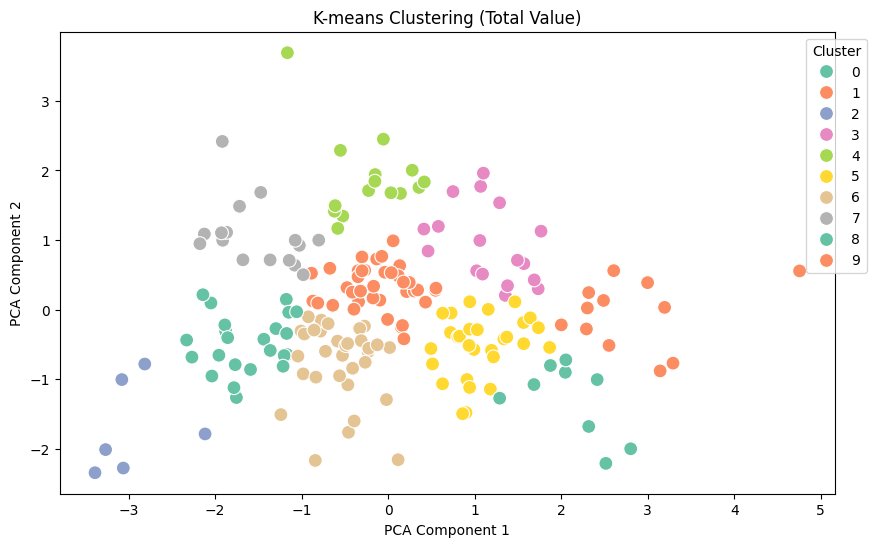

In [22]:
# Plotting K-means clustering results for Total Value
plot_clusters(kmeans_total_value, pca_components, total_value_labels, 'K-means Clustering (Total Value)')

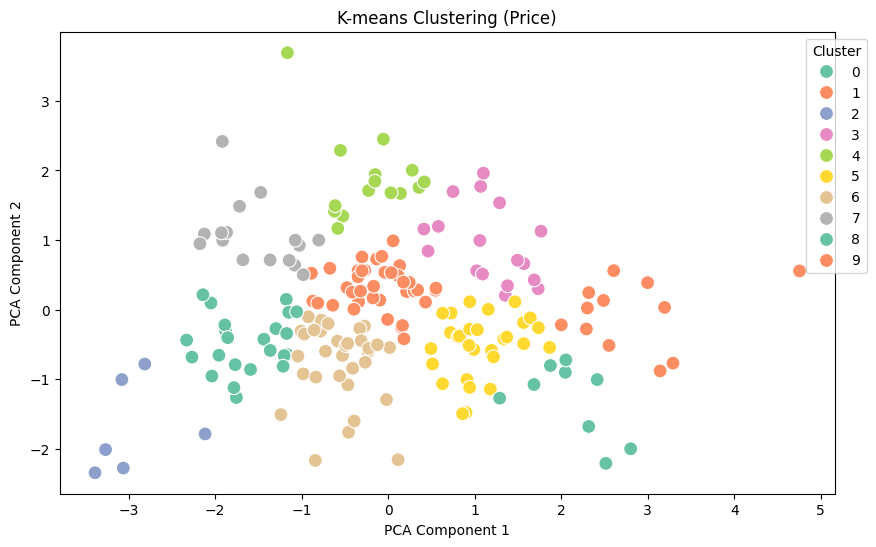

In [23]:
# Plotting K-means clustering results for Price
plot_clusters(kmeans_price, pca_components, price_labels, 'K-means Clustering (Price)')

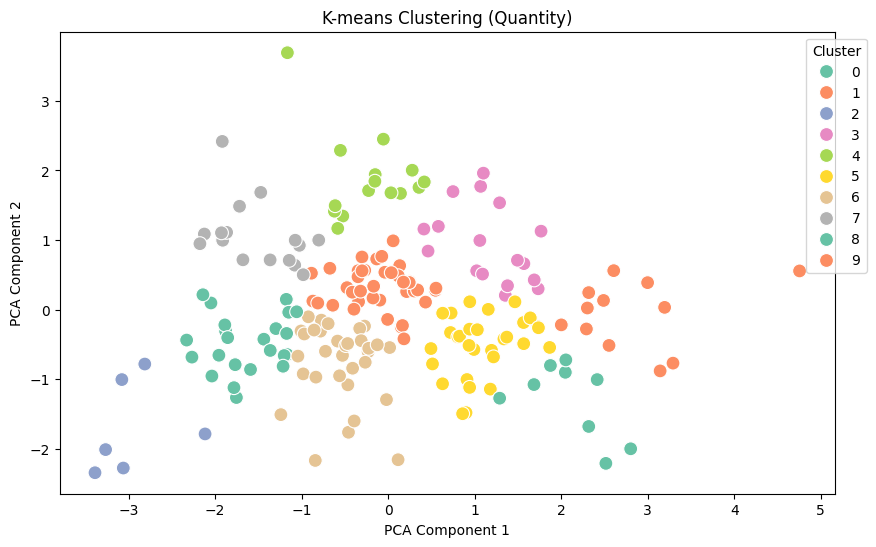

In [24]:
# Plotting K-means clustering results for Quantity
plot_clusters(kmeans_quantity, pca_components, quantity_labels, 'K-means Clustering (Quantity)')

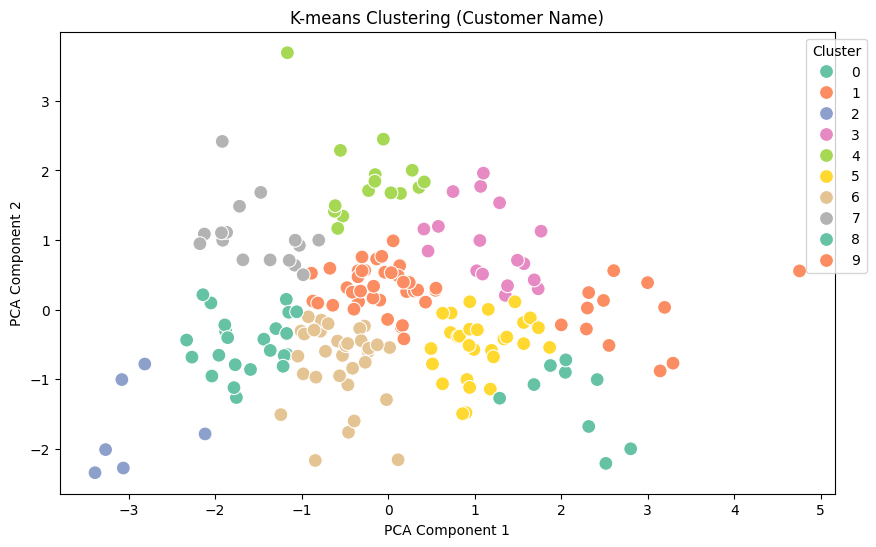

In [25]:
# Plotting K-means clustering results for Customer Name
plot_clusters(kmeans_customer_name, pca_components, customer_name_labels, 'K-means Clustering (Customer Name)')

In [26]:
# Print Davies-Bouldin Index values
print(f'Davies-Bouldin Index for Region Clustering (4 clusters): {db_region}')
print(f'Davies-Bouldin Index for Total Value Clustering (10 clusters): {db_total_value}')
print(f'Davies-Bouldin Index for Price Clustering (10 clusters): {db_price}')
print(f'Davies-Bouldin Index for Quantity Clustering (10 clusters): {db_quantity}')
print(f'Davies-Bouldin Index for Customer Name Clustering (10 clusters): {db_customer_name}')

# Calculate Silhouette Score for K-means Clustering by Region
sil_score_region = silhouette_score(final_data[['total_quantity', 'total_value', 'avg_price']], region_labels)
print(f'Silhouette Score for K-means Region Clustering: {sil_score_region}')

# DBSCAN evaluation
print(f'DBSCAN Labels: {np.unique(dbscan_labels)}')  # Show unique DBSCAN labels (clusters)

Davies-Bouldin Index for Region Clustering (4 clusters): 1.12180191226693
Davies-Bouldin Index for Total Value Clustering (10 clusters): 0.874354292939002
Davies-Bouldin Index for Price Clustering (10 clusters): 0.874354292939002
Davies-Bouldin Index for Quantity Clustering (10 clusters): 0.874354292939002
Davies-Bouldin Index for Customer Name Clustering (10 clusters): 0.874354292939002
Silhouette Score for K-means Region Clustering: 0.31097951039547694
DBSCAN Labels: [-1  0  1]
